# Regression

## Task 8: Loading and Initial Data Preparation

Prepare the California housing dataset for further regression analysis.  
In this step, we load the data, analyze its structure, and identify the unique values of a categorical variable.


In [27]:
# Imports for this notebook
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.linear_model import LinearRegression


In [28]:
# a) Load the dataset from the CSV file
df = pd.read_csv("housing.csv")
df.head()


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [29]:
# b) Display basic information about the dataset
df.info()

df.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [30]:
# c) Unique values of the "ocean_proximity" column
print("Unique values in 'ocean_proximity':")
df["ocean_proximity"].value_counts()


Unique values in 'ocean_proximity':


ocean_proximity
<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: count, dtype: int64

## Task 9: Data Visualization

In this step, we will explore the distribution of a categorical variable and the relationships between selected numerical features.


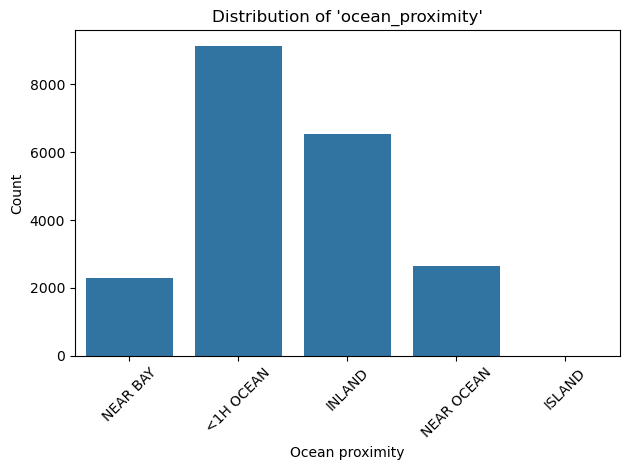

In [31]:
# a) Bar plot for the "ocean_proximity" variable
sns.countplot(data=df, x="ocean_proximity")
plt.title("Distribution of 'ocean_proximity'")
plt.xlabel("Ocean proximity")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


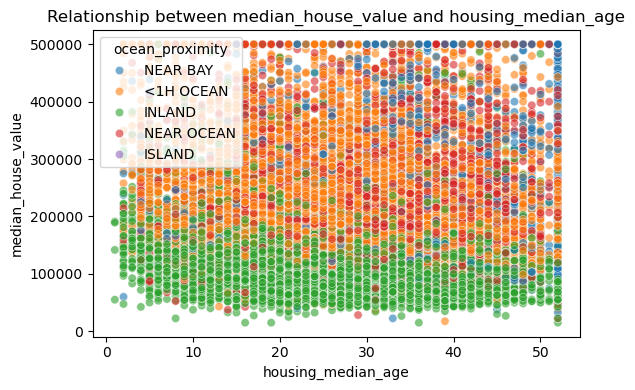

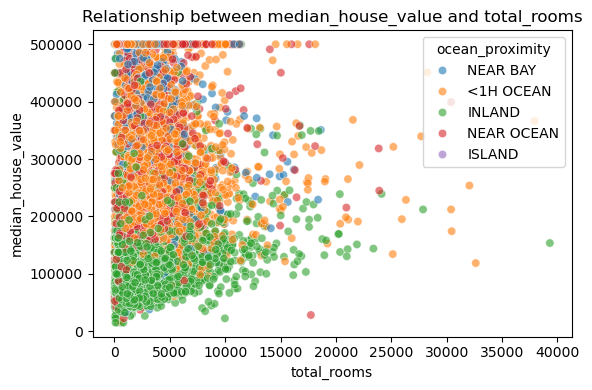

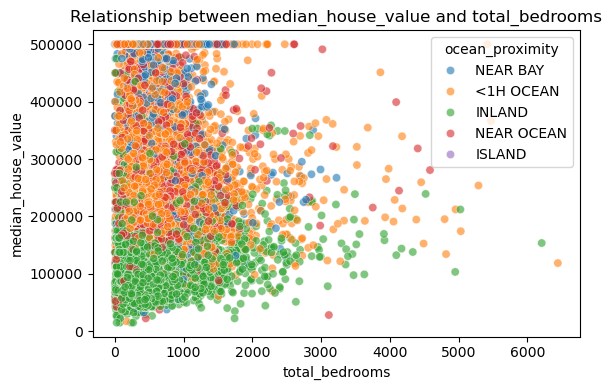

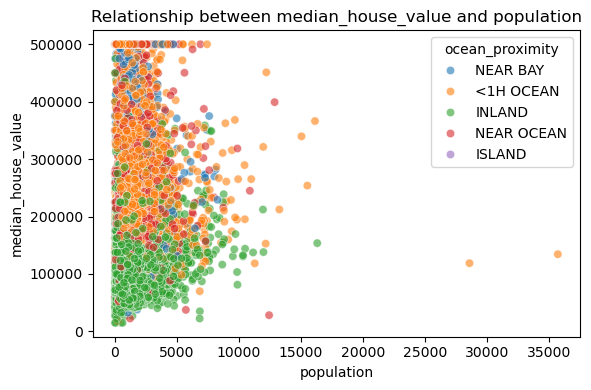

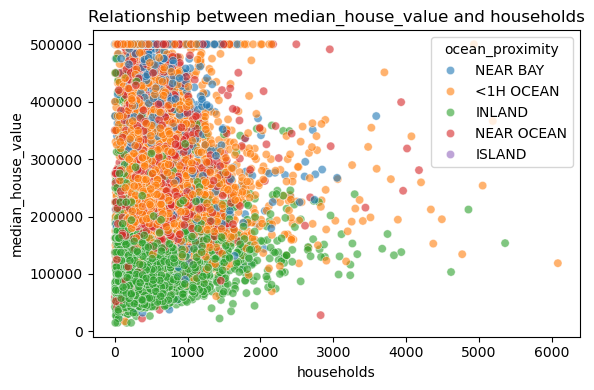

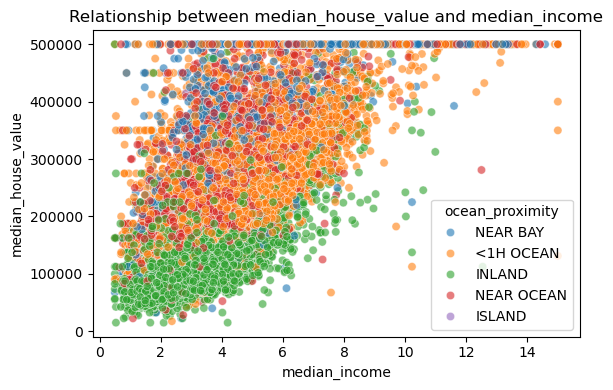

In [32]:
# b) Scatter plots for selected features vs. median_house_value
features = ["housing_median_age", "total_rooms", "total_bedrooms", "population", "households", "median_income"]

for col in features:
    plt.figure(figsize=(6, 4))
    sns.scatterplot(data=df, x=col, y="median_house_value", hue="ocean_proximity", alpha=0.6)
    plt.title(f"Relationship between median_house_value and {col}")
    plt.tight_layout()
    plt.show()


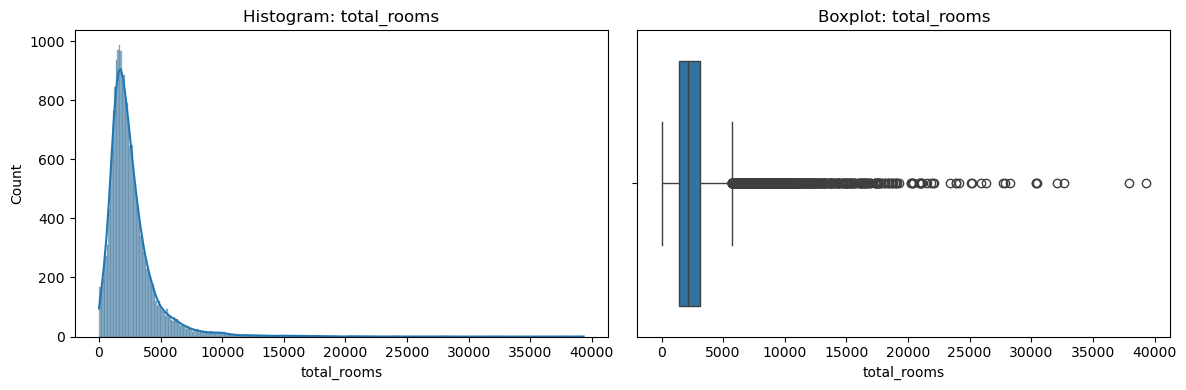

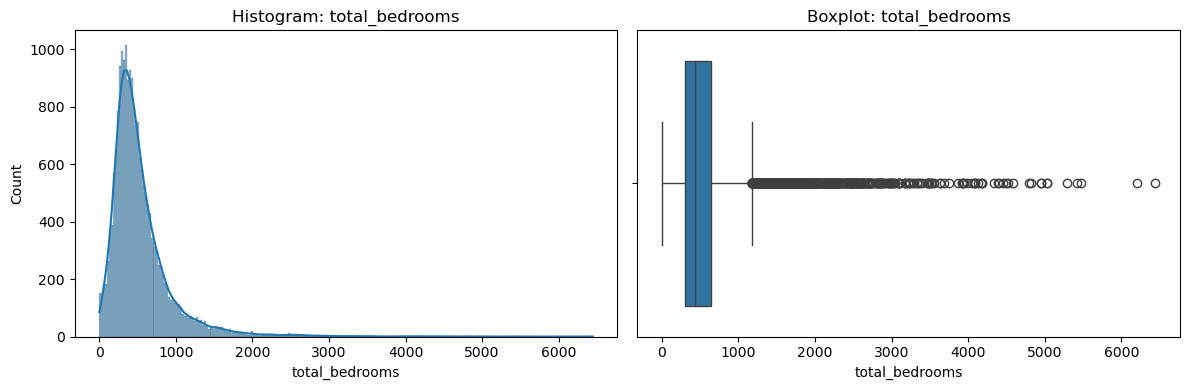

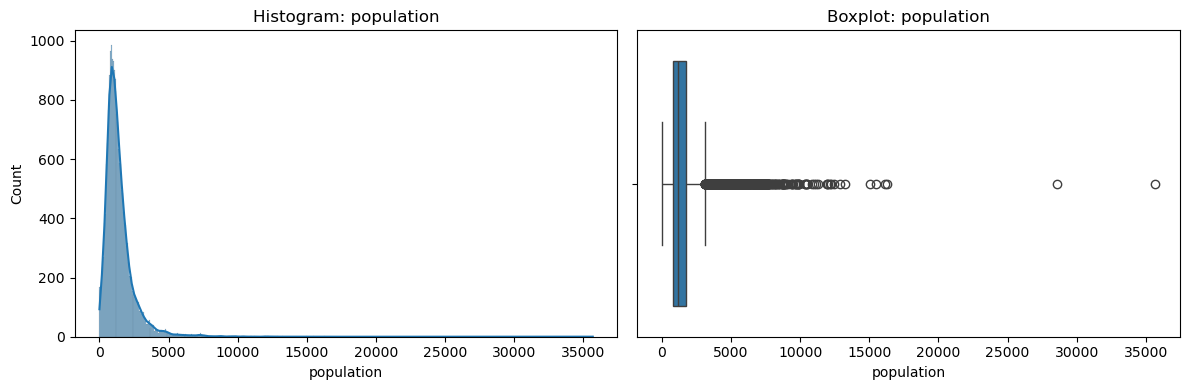

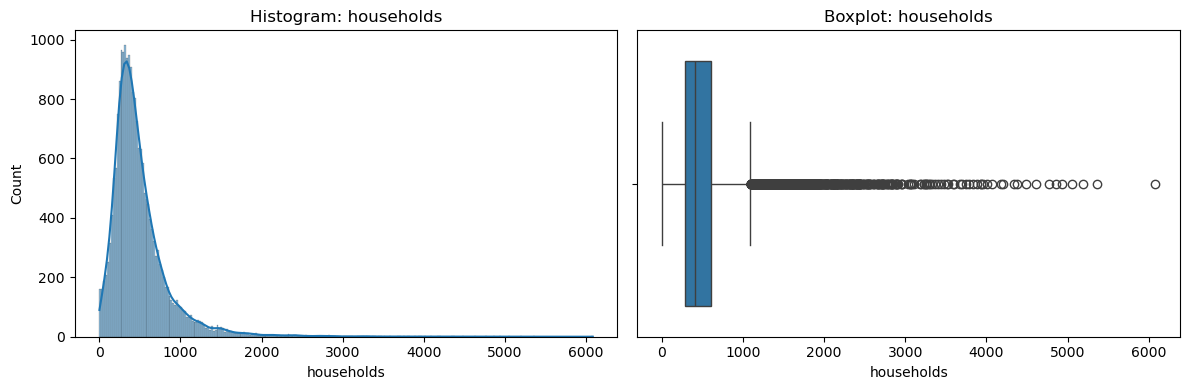

In [33]:
# c) Histograms and boxplots for 4 selected features
for col in ["total_rooms", "total_bedrooms", "population", "households"]:
    fig, axs = plt.subplots(1, 2, figsize=(12, 4))
    sns.histplot(df[col], kde=True, ax=axs[0])
    axs[0].set_title(f"Histogram: {col}")
    sns.boxplot(x=df[col], ax=axs[1])
    axs[1].set_title(f"Boxplot: {col}")
    plt.tight_layout()
    plt.show()


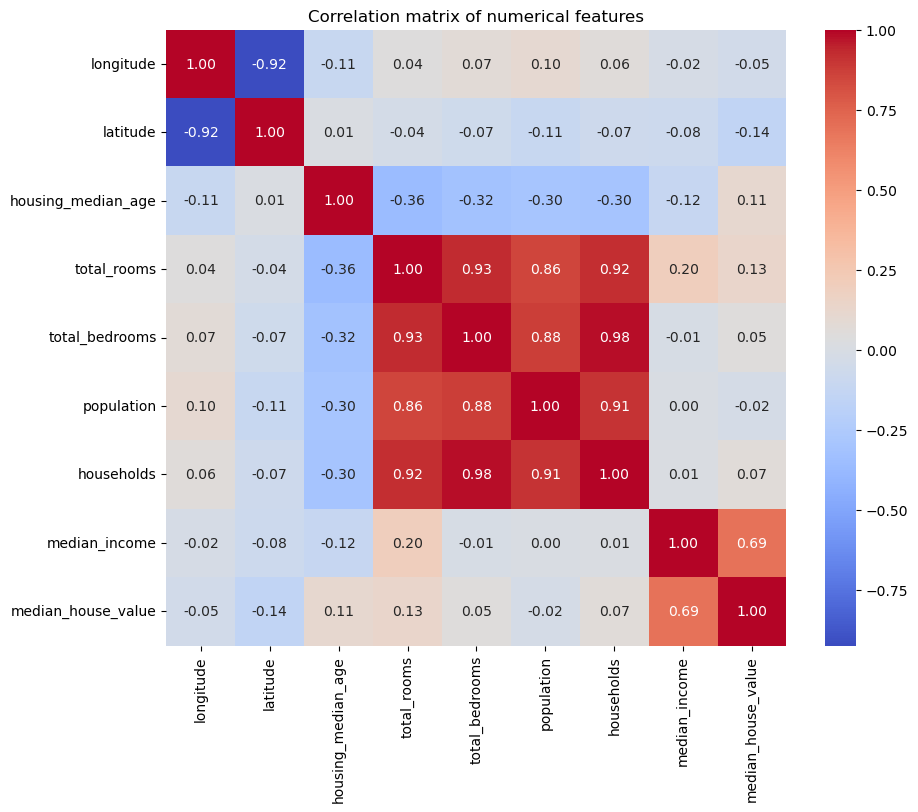

In [34]:
# d) Correlation matrix + heatmap
corr_matrix = df.corr(numeric_only=True)
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Correlation matrix of numerical features")
plt.show()

# - median_income is strongly correlated with median_house_value (r = 0.69)
# - total_rooms, total_bedrooms, population, households are strongly correlated with each other


## Task 10: Imputing Missing Data

Estimate missing values in the `total_bedrooms` column based on other features that are strongly correlated with it.


In [35]:
# a) Check correlations with total_bedrooms
corr_matrix["total_bedrooms"].sort_values(ascending=False)


total_bedrooms        1.000000
households            0.979728
total_rooms           0.930380
population            0.877747
longitude             0.069608
median_house_value    0.049686
median_income        -0.007723
latitude             -0.066983
housing_median_age   -0.320451
Name: total_bedrooms, dtype: float64

In [36]:
# b) Create a boolean mask for rows with missing values in total_bedrooms
rows_NA = df["total_bedrooms"].isna()


In [37]:
# c) Extract rows without missing values + only features strongly correlated with total_bedrooms
X_OK = df.loc[~rows_NA, ["total_rooms", "households", "population"]]


In [38]:
# d) Target values – the total_bedrooms column
y_OK = df.loc[~rows_NA, "total_bedrooms"]


In [39]:
# e) Train a linear regression model to impute missing values
model = LinearRegression()
model.fit(X_OK, y_OK)


LinearRegression()

In [40]:
# f) Extract rows with missing values – using the same columns as X_OK
X_NA = df.loc[rows_NA, ["total_rooms", "households", "population"]]


In [41]:
# g) Predict missing values and update the DataFrame
df.loc[rows_NA, "total_bedrooms"] = model.predict(X_NA)


In [42]:
# h) Verify that the missing values have been filled – check again
print("total_bedrooms missing values:", df["total_bedrooms"].isna().sum())
df.info()


total_bedrooms missing values: 0
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20640 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB
